In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# Load the dataset 
file_path = r"C:\Users\Abhigyan Borah\Desktop\dataset transfomers\keystroke_ano\csv_output\User1.csv"

df = pd.read_csv(file_path, encoding='latin1')  # Use 'latin1' to avoid encoding issues


df.head()


,Timestamp,EventType,Key,Username
0,"2017-03-20 01:24:55,555",RESTART,NaN,NaN
1,"2017-03-20 01:25:20,894",release,Key.alt_l,User1
2,"2017-03-20 01:25:20,910",release,Key.ctrl_l,User1
3,"2017-03-20 01:25:20,910",release,Key.shift,User1
4,"2017-03-20 01:25:20,910",release,Key.cmd,User1


In [3]:
# Check shape and columns
print(f"Shape: {df.shape}")
print("Columns:", df.columns.tolist())

# Rename if needed (depends on dataset)
# df = df.rename(columns={'v1': 'label', 'v2': 'text'})




Shape: (195036, 4)
Columns: ['Timestamp', 'EventType', 'Key', 'Username']


In [4]:
print("Columns in the dataset:")
print(df.columns.tolist())


df.head()


Columns in the dataset:
['Timestamp', 'EventType', 'Key', 'Username']


,Timestamp,EventType,Key,Username
0,"2017-03-20 01:24:55,555",RESTART,NaN,NaN
1,"2017-03-20 01:25:20,894",release,Key.alt_l,User1
2,"2017-03-20 01:25:20,910",release,Key.ctrl_l,User1
3,"2017-03-20 01:25:20,910",release,Key.shift,User1
4,"2017-03-20 01:25:20,910",release,Key.cmd,User1


In [5]:

print(df.info())

# Check unique event types (e.g., press, release, REFRESH)
print("\nUnique Event Types:")
print(df['EventType'].unique())

# Unique keys
print("\nUnique Keys:")
print(df['Key'].unique())

# Unique usernames
print("\nUnique Users:")
print(df['Username'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195036 entries, 0 to 195035
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Timestamp  195036 non-null  object
 1   EventType  195036 non-null  object
 2   Key        194326 non-null  object
 3   Username   194326 non-null  object
dtypes: object(4)
memory usage: 6.0+ MB
None

Unique Event Types:
['RESTART' 'release' 'press' 'REFRESH']

Unique Keys:
[nan 'Key.alt_l' 'Key.ctrl_l' 'Key.shift' 'Key.cmd' 'Key.alt_r'
 'Key.ctrl_r' 'Key.shift_r' 'Key.cmd_r' "u'LEFT'" "u'RIGHT'" "u'CENTER'"
 "u'None'" 'Key.backspace' 'Key.space' 'Key.enter' "u'DIGIT'" 'Key.tab'
 'Key.up' 'Key.down' 'Key.delete' 'Key.caps_lock' 'Key.right'
 'Key.num_lock' '<175>' '<174>' '<135>' 'Key.esc' '<47>' 'Key.f11'
 'Key.f12' 'Key.left' '<241>' '<234>' 'Key.f7']

Unique Users:
[nan 'User1']


In [6]:

if 'Key' in df.columns:
    unique_keys = df['Key'].dropna().unique()  # Drop NaNs (for rows like REFRESH)
    print(f"Total Unique Keys: {len(unique_keys)}")
    print("Unique Key Values:")
    for key in unique_keys:
        print(key)
else:
    print("'Key' column not found in the DataFrame.")


Total Unique Keys: 34
Unique Key Values:
Key.alt_l
Key.ctrl_l
Key.shift
Key.cmd
Key.alt_r
Key.ctrl_r
Key.shift_r
Key.cmd_r
u'LEFT'
u'RIGHT'
u'CENTER'
u'None'
Key.backspace
Key.space
Key.enter
u'DIGIT'
Key.tab
Key.up
Key.down
Key.delete
Key.caps_lock
Key.right
Key.num_lock
<175>
<174>
<135>
Key.esc
<47>
Key.f11
Key.f12
Key.left
<241>
<234>
Key.f7


C:\Users\Abhigyan Borah\AppData\Local\Temp\ipykernel_29292\3336381617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keys.values, y=top_keys.index, palette='magma')


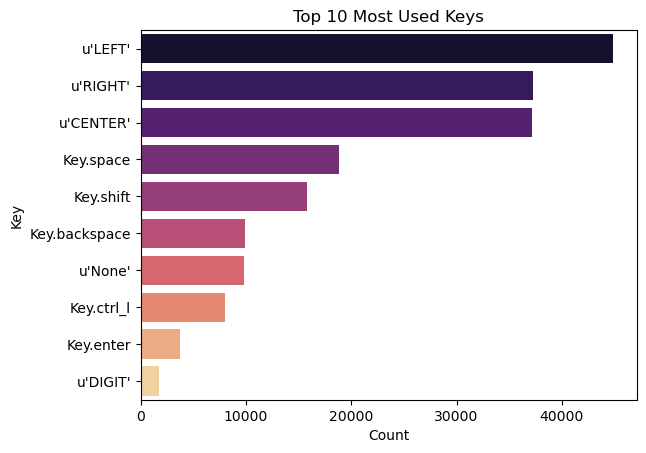

In [8]:
top_keys = df['Key'].value_counts().head(10)
sns.barplot(x=top_keys.values, y=top_keys.index, palette='magma')
plt.title("Top 10 Most Used Keys")
plt.xlabel("Count")
plt.ylabel("Key")
plt.show()


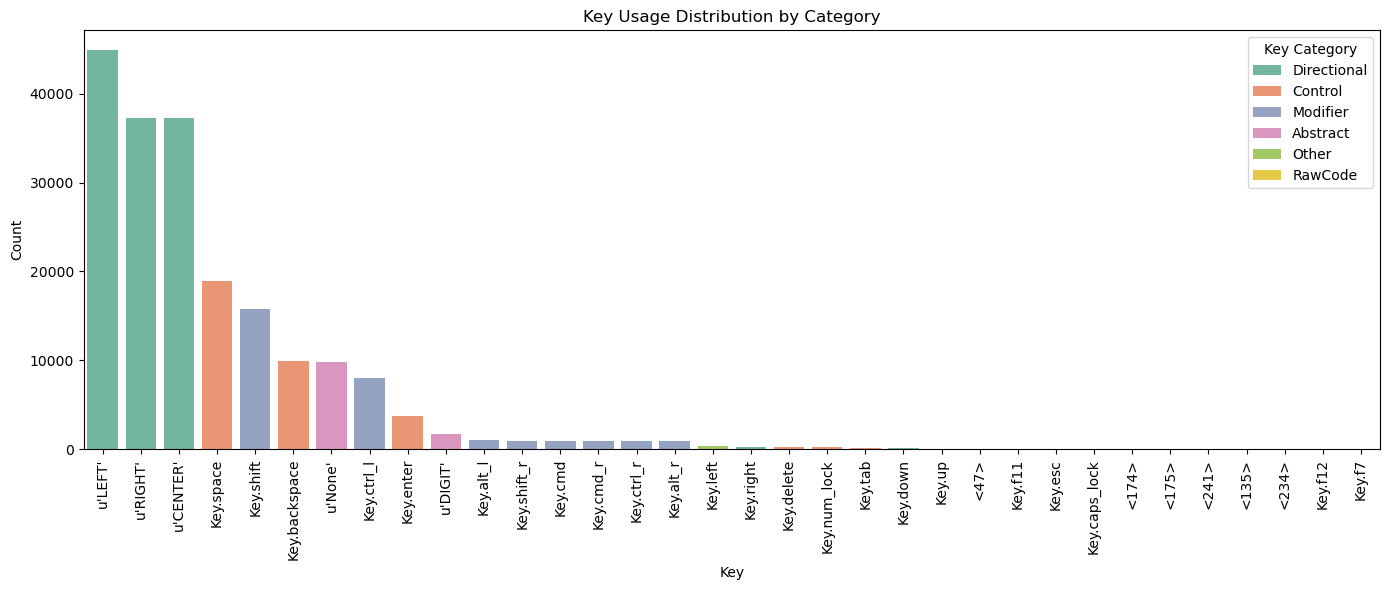

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Categorization map for all unique keys
key_categories = {
    # Modifier keys
    'Key.alt_l': 'Modifier', 'Key.ctrl_l': 'Modifier', 'Key.shift': 'Modifier',
    'Key.cmd': 'Modifier', 'Key.alt_r': 'Modifier', 'Key.ctrl_r': 'Modifier',
    'Key.shift_r': 'Modifier', 'Key.cmd_r': 'Modifier',

    # Directional / positional keys
    "u'LEFT'": 'Directional', "u'RIGHT'": 'Directional', "u'CENTER'": 'Directional',
    'Key.up': 'Directional', 'Key.down': 'Directional', 'Key.right': 'Directional',

    # Control / action keys
    'Key.backspace': 'Control', 'Key.space': 'Control', 'Key.enter': 'Control',
    'Key.tab': 'Control', 'Key.delete': 'Control', 'Key.esc': 'Control',
    'Key.caps_lock': 'Control', 'Key.num_lock': 'Control', 'Key.f11': 'Control',

    # Abstract / placeholder
    "u'DIGIT'": 'Abstract', "u'None'": 'Abstract',

    # Raw key codes
    '<175>': 'RawCode', '<174>': 'RawCode', '<135>': 'RawCode', '<47>': 'RawCode'
}

# Count key frequencies
key_counts = df['Key'].value_counts().dropna()

# Assign categories to each key based on mapping
category_data = []
for key, count in key_counts.items():
    category = key_categories.get(key, 'Other')
    category_data.append({'Key': key, 'Count': count, 'Category': category})

# Create DataFrame from categorized keys
key_df = pd.DataFrame(category_data)

# Plot using seaborn
plt.figure(figsize=(14, 6))
sns.barplot(data=key_df, x='Key', y='Count', hue='Category', dodge=False, palette='Set2')
plt.title("Key Usage Distribution by Category")
plt.xlabel("Key")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Key Category")
plt.tight_layout()
plt.show()
